In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from tensorflow import keras 
from sklearn.preprocessing import MinMaxScaler

start_time = time.time()
dataset = pd.read_csv(r'Download Data - INDEX_US_S&P US_SPX-5 years.csv')
dataset['Date'] = pd.to_datetime(dataset.Date,format='%m/%d/%Y')
dataset.index = dataset['Date']

dataset = dataset.sort_index(ascending=True, axis=0)
dataset2 = pd.DataFrame(index=range(0,len(dataset)),columns=['Date', 'Close'])

for i in range(0,len(dataset)):
    dataset2['Date'][i] = dataset['Date'][i]
    dataset2['Close'][i] = dataset['Close'][i]

dataset2.index = dataset2.Date
dataset2.drop('Date', axis=1, inplace = True)

dataset2.replace(',','', regex=True, inplace=True)
#print(dataset2)

dataset3 = dataset2.values 
dataset3.astype(float)
#print(dataset3)

train = dataset3[0:500, :]
valid = dataset3[500:, :]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset3)
#print(scaled_data)

In [2]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=1000, return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=1000, return_sequences = True))
model.add(keras.layers.LSTM(units=800, return_sequences = True))
model.add(keras.layers.LSTM(units=1000))
model.add(keras.layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

440/440 - 1786s - loss: 0.0019 - 1786s/epoch - 4s/step


In [3]:
inputs = dataset3[len(dataset3) - len(valid) - 60:]
inputs = inputs.reshape(-1, 1)
inputs  = scaler.transform(inputs)
print(inputs.shape)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test.astype(float)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
closing_price.astype(float)

print(type(closing_price))
print(X_test.shape)

(822, 1)
<class 'numpy.ndarray'>
(762, 60, 1)


12.01820652453703
3.4667285045900305
              Close  Predictions
Date                            
2019-02-15  2775.60  2751.588623
2019-02-19  2779.76  2771.660156
2019-02-20  2784.70  2789.124268
2019-02-21  2774.88  2801.140869
2019-02-22  2792.67  2807.142578
...             ...          ...
2022-02-16  4475.01  4570.559082
2022-02-17  4380.26  4532.376953
2022-02-18  4348.87  4513.361328
2022-02-22  4304.76  4504.046387
2022-02-23  4225.50  4485.562012

[762 rows x 2 columns]
--- 1854.2255191802979 seconds ---
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/shared-libs/python3.

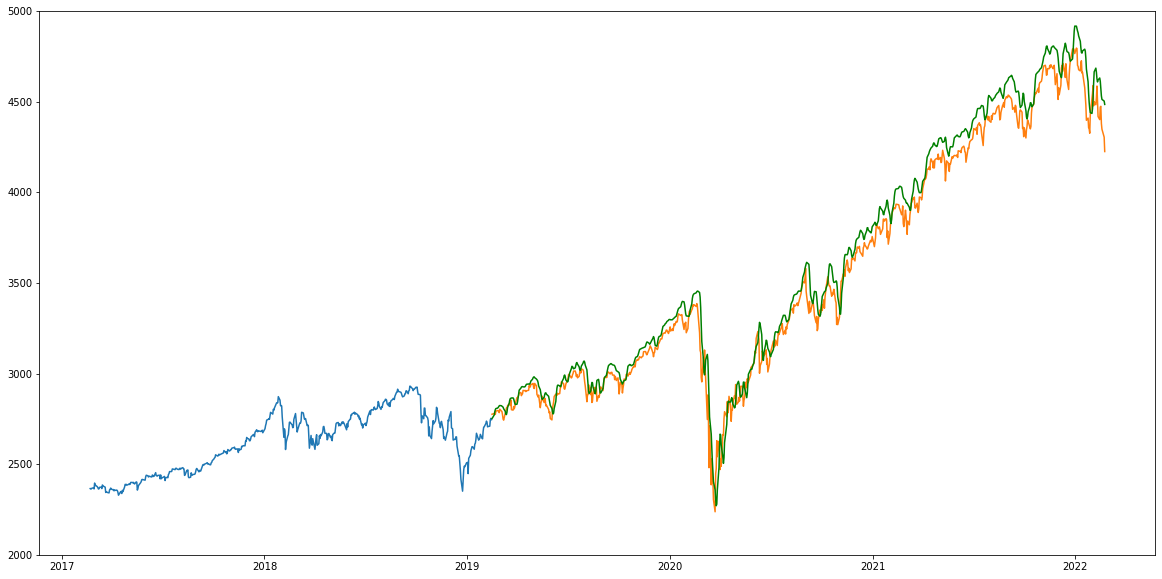

In [4]:
train = dataset2[:500]
valid = dataset2[500:]
valid['Predictions'] = closing_price
valid['Close'] = valid['Close'].astype(float)
train['Close'] = train['Close'].astype(float)
#plt.figure(figsize=(20,10))
plt.ylim((2000,5000))

mse = np.mean((valid['Close'] - valid['Predictions'])**2)/len(valid['Predictions'])
print(mse)
rmse = np.sqrt(mse)
print(rmse)

print(valid)

plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(valid['Predictions'],'g')

print("--- %s seconds ---" % (time.time() - start_time))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4b9a3ce6-0aaf-4346-9f9a-23d001b9ed58' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>